In [17]:
#Practical Implementation of CNN
#Number of Layers in CNN-4Layers
#Convolutional,Pooling,Flatten Layer,Fully Connected Layer

In [18]:
#In Convolution and Pooling Dimensionality Reduction Will Happen,These are Also Known as 
#Feature Extraction Layers,Then Flatten,Then Fully Connected Layer(Normal ANN)

In [19]:
#ANN Only Accept Vector(Fully Connected Layer) To Convert Matrix to Vector

In [20]:
#Classes Should In the Name of Folders

In [21]:
#Inside Each Folder It Should Have Only Image of that Specific Class

In [22]:
#Importing Libraries

In [23]:
#Time Complexity is Only The Constraint

In [24]:
#Training and Testing Folders Must Have The Same No of Class(Folders)  in Both of the Folders

In [25]:
#How Can We Tune the Model in Next Session

In [26]:
#Building the Model From Scratch is Taught Today

In [27]:
#Data Augmentation-Converting One Image into Multiple Image(But Why? A Question TO Ponder)
#Zoom The Image and Takes a Copy and In a ANgle it WIll Rotate or Flip the Image
#Converting the X Images into An Approximate of 100X Images
#Extracting More Features of the Image

In [28]:
#Code For Data Augmentation

In [29]:
#Importing Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
#Rescale=To Normalize the Data To get Values in Decimal Form THerefore the Scale is Reduced
#A Quick Execution Can Be Seen Due to Lags So Rescale is Used
#Horizontal_flip By Default False Making it into True
#This is For Normalization of Pixels(Intutively a Pattern)
#Shear_range-Giving 0.2 Little Bit Shear
Train_Gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
#For Testing U Could Use Only Rescale For Training We Need to DO Polishing But In Realtime We Need To Test OUr Model
#To Real-World Situations A New Challenges to the Model So For Training We need to Do SOme Needful Tasks to Train Our Model 
#Like a Child, Since the Values for the Model isn't Passed
Test_Gen=ImageDataGenerator(rescale=(1./255))
#Shear and OTher In Train Are Specified to Observe the More Variation's in the Image

In [31]:
#We Are Creating Another Train and Test
#So Using train_gen.flow_from_directory('Path to File',target_size=(120,120))
#To Run the Code Quickly We Make Target Size Small
#So We Need to Give Class_Mode='Categorical' and Specify batch_Size=any Number
#------------------------------------------------------------------------------------------

##Train=Train_Gen.flow_from_directory('/content/Animal_Dataset/dataset/Training',target_size=(120,120),class_mode='categorical',batch_size=8)#Colab-Version
##Test=Test_Gen.flow_from_directory('/content/Animal_Dataset/dataset/Testing',target_size=(120,120),class_mode='categorical',batch_size=8)#Colab-Version

#---------------------------------------------------------------------------------------------------------
Train=Train_Gen.flow_from_directory('Animal_Dataset/dataset/Training',target_size=(120,120),class_mode='categorical',batch_size=8)#My PC
Test=Test_Gen.flow_from_directory('Animal_Dataset/dataset/Testing',target_size=(120,120),class_mode='categorical',batch_size=8)#My PC
#-------------------------------------------------------------------------------------------------------------------
#When You Are Building a Model Ur Model Will Train For Training Target_Size Pixels
#Only So While Testing the Same Type of Image Targets Only Gets Validated Others May Result in Error

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [32]:
#Images are Converted into (120,120)
#class_mode Checks How Many Folders Found and the No of Total Images
#No Rule to Follow Data Augmentation TO Build a CNN Model So as to get Better Accuracy We Need to Perform it

In [33]:
#Building Model
#Pixel Has 0,255 The Output of Rescale Does is Converting Them to (0,1)

In [34]:
#Importing CNN Requirements
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [35]:
#Building Sequential
Model=Sequential()

In [36]:
#Giving Convolutional Layer
#In Convolution2D We Need to Pass Filters,Kernel_Size=Which is Dimension of Filter(3X3),ActivationFunction
#Input_dim If Colour=RGB(3 Layer Channel) If GrayScale=1
Model.add(Convolution2D(filters=20,kernel_size=(3,3),activation='relu',input_shape=(120,120,3)))

In [37]:
#Pooling Layer Pool Size is 2X2 Mentioned as pool_size
Model.add(MaxPooling2D(pool_size=(2,2)))

In [38]:
#Flatten Layer
#The OUtput of the Matrix is Converted into Vector
Model.add(Flatten())

In [39]:
#The ANN Dense Layers
Model.add(Dense(45,activation='relu'))
Model.add(Dense(4,activation='softmax'))

In [40]:
Train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [41]:
#Compiling the Model
Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
#Training The Model
Model.fit(Train,batch_size=8,validation_data=Test,epochs=10)

Epoch 1/10
155/155 [==============================] - 27s 169ms/step - loss: 1.3780 - accuracy: 0.5735 - val_loss: 0.5930 - val_accuracy: 0.7791
Epoch 2/10
155/155 [==============================] - 27s 171ms/step - loss: 0.5376 - accuracy: 0.8263 - val_loss: 0.2800 - val_accuracy: 0.9356
Epoch 3/10
155/155 [==============================] - 27s 173ms/step - loss: 0.3194 - accuracy: 0.9136 - val_loss: 0.1387 - val_accuracy: 0.9816
Epoch 4/10
155/155 [==============================] - 26s 167ms/step - loss: 0.1769 - accuracy: 0.9515 - val_loss: 0.1657 - val_accuracy: 0.9448
Epoch 5/10
155/155 [==============================] - 19s 124ms/step - loss: 0.1047 - accuracy: 0.9782 - val_loss: 0.1367 - val_accuracy: 0.9479
Epoch 6/10
155/155 [==============================] - 18s 117ms/step - loss: 0.0970 - accuracy: 0.9806 - val_loss: 0.0383 - val_accuracy: 0.9969
Epoch 7/10
155/155 [==============================] - 18s 118ms/step - loss: 0.0922 - accuracy: 0.9782 - val_loss: 0.0108 - val_ac

In [53]:
#TensorFLow Files On .h5 Extension
#Since Each Run-Time Takes More than 10 Minutes So We Can Save That using 
#This Command Model.save('AnyName.h5')
Model.save('animalWeights.h5')

In [1]:
#Testing
#Importing Testing Libraries
import numpy as np
image.load_img('Crow.jpg',target_size=(120,120))

In [65]:
#Download ANy Image And Test IT Eg Elephant Image(Any Random One)
#If Target Size isnt Specified Then No Output Because ANy Random Image Will Have ANy Dimension
#--------------------------------------------------------------------------
# img=image.load_img('/content/Crow.jpg',target_size=(120,120))(Colab-Version)
#-----------------------------------------------------------------------------------
img=image.load_img('Rats.jpg',target_size=(120,120))

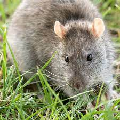

In [66]:
img

In [67]:
img = image.img_to_array(img)
img

array([[[190., 215., 160.],
        [188., 207., 162.],
        [177., 186., 155.],
        ...,
        [196., 202., 140.],
        [201., 209., 132.],
        [190., 202., 128.]],

       [[178., 203., 145.],
        [177., 197., 148.],
        [168., 178., 143.],
        ...,
        [181., 186., 130.],
        [177., 184., 114.],
        [177., 187., 116.]],

       [[165., 190., 122.],
        [164., 186., 124.],
        [158., 169., 126.],
        ...,
        [174., 177., 132.],
        [178., 184., 124.],
        [162., 169., 101.]],

       ...,

       [[104., 141.,  36.],
        [183., 217., 122.],
        [110., 138.,  61.],
        ...,
        [167., 197.,  83.],
        [144., 168.,  72.],
        [134., 163.,  71.]],

       [[115., 153.,  44.],
        [181., 219., 116.],
        [124., 165.,  73.],
        ...,
        [170., 196.,  95.],
        [ 97., 109.,  23.],
        [155., 178.,  88.]],

       [[ 83., 122.,  16.],
        [ 93., 133.,  34.],
        [150., 1

In [68]:
img=np.expand_dims(img,axis=0)#On Which Axis Dimension Must Be Increased
img#If We Chcek The Output Previously 2 Channels and After the Above Command The Image Is Expanded
#to Three Channels SO RGB Version
#Axis =0 Because CNN Model Accepts this Kind of Dimension ?
#Convolution and MaxPooling The OUtput is in the Form of 3Dimension/Multimdimensional Array SO Expand Dimension is Used ON Axis=0

array([[[[190., 215., 160.],
         [188., 207., 162.],
         [177., 186., 155.],
         ...,
         [196., 202., 140.],
         [201., 209., 132.],
         [190., 202., 128.]],

        [[178., 203., 145.],
         [177., 197., 148.],
         [168., 178., 143.],
         ...,
         [181., 186., 130.],
         [177., 184., 114.],
         [177., 187., 116.]],

        [[165., 190., 122.],
         [164., 186., 124.],
         [158., 169., 126.],
         ...,
         [174., 177., 132.],
         [178., 184., 124.],
         [162., 169., 101.]],

        ...,

        [[104., 141.,  36.],
         [183., 217., 122.],
         [110., 138.,  61.],
         ...,
         [167., 197.,  83.],
         [144., 168.,  72.],
         [134., 163.,  71.]],

        [[115., 153.,  44.],
         [181., 219., 116.],
         [124., 165.,  73.],
         ...,
         [170., 196.,  95.],
         [ 97., 109.,  23.],
         [155., 178.,  88.]],

        [[ 83., 122.,  16.],
       

In [69]:
Val=Model.predict(img)
#Np.argmax(Model.predict(img)) Will Give the Index Number SO Cross Check WIth Cross_indices

1/1 [==============================] - 0s 45ms/step


In [70]:
Val

array([[0., 0., 1., 0.]], dtype=float32)

In [71]:
np.argmax(Val)

2

In [64]:
#Tommorow We Learn About Tuning Model